In [1]:
import numpy as np 
import pandas as pd
import datetime

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
stations = pd.read_csv("Data/station.csv")
stations.head()

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


In [3]:
len(stations.id.unique())

70

In [3]:
df = pd.read_csv("Data/trip.csv")
df.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [4]:
df.describe()

,id,duration,start_station_id,end_station_id,bike_id
count,669959.000000,6.699590e+05,669959.000000,669959.000000,669959.000000
mean,460382.009899,1.107950e+03,57.851876,57.837438,427.587620
std,264584.458487,2.225544e+04,17.112474,17.200142,153.450988
min,4069.000000,6.000000e+01,2.000000,2.000000,9.000000
25%,231082.500000,3.440000e+02,50.000000,50.000000,334.000000
50%,459274.000000,5.170000e+02,62.000000,62.000000,440.000000
75%,692601.000000,7.550000e+02,70.000000,70.000000,546.000000
max,913460.000000,1.727040e+07,84.000000,84.000000,878.000000


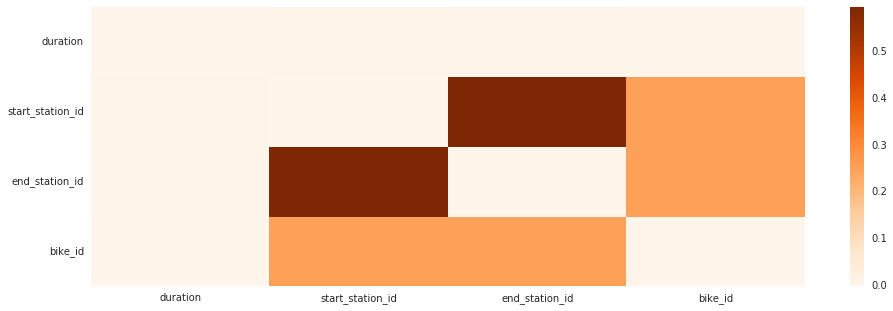

In [5]:
print len(df.start_station_id.unique())
print len(df.start_station_name.unique())
print len(df.end_station_name.unique())


70
74
74


Ver porqué se da esto.

In [10]:

print [x for x in  list(set(df.start_station_name.unique())) if x not in list(set(stations.name.unique()))]

print [x for x in  list(set(df.start_station_id.unique())) if x not in list(set(stations.id.unique()))]

print df.loc[df['start_station_name'] == 'San Jose Government Center','start_station_id'].unique(), df.loc[df['start_station_name'] == 'Washington at Kearny','start_station_id'].unique(), df.loc[df['start_station_name'] == 'Post at Kearny','start_station_id'].unique(), df.loc[df['start_station_name'] == 'Broadway at Main','start_station_id'].unique()

['San Jose Government Center', 'Washington at Kearny', 'Post at Kearny', 'Broadway at Main']
[]
[80] [46] [47] [25]


Los ids presentes en ambos csv son los mismos, la diferencia esta en los nombres de las estaciones.
Para las estaciones con id: 25, 46, 47, 80  los nombres no coinciden con la informacion registrada en stations.csv

Comparemos como se dan las diferencias:

In [7]:
d={}
dok = {}

for id in stations.id.unique():   
    d[id] = list((set((df.loc[df['start_station_id'] == id, 'start_station_name']).tolist())))
    dok[id] = (stations.loc[stations['id'] == id, 'name']).to_string()

    
test =  pd.DataFrame(dok.items(), columns=['id','station_name'])
test = test.set_index('id')
test['trips_names'] = pd.Series(d, name='name')

test.head(70)


,station_name,trips_names
id,,
2,0 San Jose Diridon Caltrain Station,[San Jose Diridon Caltrain Station]
3,1 San Jose Civic Center,[San Jose Civic Center]
4,2 Santa Clara at Almaden,[Santa Clara at Almaden]
5,3 Adobe on Almaden,[Adobe on Almaden]
6,4 San Pedro Square,[San Pedro Square]
7,5 Paseo de San Antonio,[Paseo de San Antonio]
8,6 San Salvador at 1st,[San Salvador at 1st]
9,7 Japantown,[Japantown]
10,8 San Jose City Hall,[San Jose City Hall]


Conclusion:
- Los ids se respetan con su correspondiente estación.
- Tenemos casos mal seteados:
    -  id: 25 corresponde a la estación: Stanford in Redwood City. 
    En los registros de viajes es usado para Stanford in Redwood City y  Broadway at Main.
    
    -  id: 46 corresponde a la estación: Washington at Kearney. 
    En los registros de viajes es usasdo para Washington at Kearney, Washington at Kearny. 
    En este caso claramente el error es de tipeo.
    
    -  id: 47 corresponde a la estación: Post at Kearney
    En los registros de viajes es usasdo para Post at Kearney y Post at Kearny.
    Ocurre lo mismo que para el punto anterior
    
    -  id: 80 corresponde a la estación: Santa Clara County Civic Center.
    En los registros de viajes es usado para San Jose Government Center y Santa Clara County Civic Center
    

In [8]:
print df.loc[df['start_station_name'] == 'San Jose Government Center','start_station_id'].count()
print df.loc[df['end_station_name'] == 'San Jose Government Center','end_station_id'].count()
print df.loc[df['start_station_name'] == 'Washington at Kearny','start_station_id'].count()
print df.loc[df['end_station_name'] == 'Washington at Kearny','end_station_id'].count()
print df.loc[df['start_station_name'] == 'Post at Kearny','start_station_id'].count()
print df.loc[df['end_station_name'] == 'Post at Kearny','end_station_id'].count()
print df.loc[df['start_station_name'] == 'Broadway at Main','start_station_id'].count()
print df.loc[df['end_station_name'] == 'Broadway at Main','end_station_id'].count()

23
23
4292
5461
6960
6959
67
81


Opciones:
- Dado al hecho que para el primer y último caso son muy pocos los registros podríamos a borrar todas aquellas filas cuyo station name sea uno de esos. Para los casos 2 y 3 se corregiría Kearny por Kearney
- Borrar todos los casos que presenten estos station names
- Dejar todos y no hacer nada